In [1]:
import torch

In [2]:
x = torch.randn(3, requires_grad=True)

In [3]:
x

tensor([-0.0956,  0.3544, -0.0021], requires_grad=True)

In [4]:
y = x + 2
y

tensor([1.9044, 2.3544, 1.9979], grad_fn=<AddBackward0>)

In [5]:
print(x)
print(y)
print(y.grad_fn)

tensor([-0.0956,  0.3544, -0.0021], requires_grad=True)
tensor([1.9044, 2.3544, 1.9979], grad_fn=<AddBackward0>)


In [6]:
z = y * y * 3

In [7]:
y * y * 3

tensor([10.8806, 16.6299, 11.9750], grad_fn=<MulBackward0>)

In [8]:
y * y

tensor([3.6269, 5.5433, 3.9917], grad_fn=<MulBackward0>)

In [9]:
z = z.mean()

In [10]:
print(x.grad)
z.backward()
print(x.grad)
# This z.backward() just computes the chain rule
# and then x.grad is just the gradient \nabla_x z

None
tensor([3.8089, 4.7088, 3.9958])


In [11]:
x

tensor([-0.0956,  0.3544, -0.0021], requires_grad=True)

This last line is dz/dx, where z(x) = mean(3 * ((x + 2)^2)). We can check this gave us the right answer: dz/dx is just 
\begin{align*}
    \nabla_x z &= \nabla_x \frac{3 * [(x_1 + 2)^2 + (x_2 + 2)^2 + (x_3 + 2)^2]}{3} \\ 
    &= \nabla_x  [(x_1 + 2)^2 + (x_2 + 2)^2 + (x_3 + 2)^2] \\ 
    &= 2*(x_1 + 2, x_2 + 2, x_3 + 2) \\ 
    &= 2x + (4, 4, 4).
\end{align*}
One can plug in whatever random values were initialized for $x$ above and see the answers agree.

In [12]:
# We want to train a neural network to approximate a linear function
# f(x) = 2*x

X = torch.tensor([1,2,3,4,5,6,7,8], dtype=torch.float32)
y = torch.tensor([2,4,6,8,10,12,14,16], dtype=torch.float32)

In [13]:
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [14]:
def forward(x):
    return w*x

def loss(y, y_pred):
    return ((y - y_pred)**2).mean()

In [15]:
X_test = 5.0

In [16]:
print(f'Prediction before training: f({X_test}) = {forward(X_test):.3f}')

Prediction before training: f(5.0) = 0.000


In [17]:
# Training
learning_rate = 0.01 # how far we step along the -gradient
n_epochs = 100

for epoch in range(n_epochs):
    # predict - do the forward pass with the current weights
    y_pred = forward(X)
    
    # calculate the loss
    l = loss(y, y_pred)
    
    # calculate the gradient d loss / d weights
    l.backward() # this automatically calculates and updates the gradient of loss w.r.t w
    
    # update the weights based on this
    # gradient descent: reset w_new to be w_old - w.grad()*learning_rate
    with torch.no_grad():
        w = w - learning_rate*w.grad
        
    # empty the gradients after updating
    w = w.clone().detach().requires_grad_(True)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, weight: {w:.3f} and loss: {l:.3f}')
        
print(f'Result after training: f({X_test}) = {forward(X_test)}')

Epoch 0, weight: 1.020 and loss: 102.000
Epoch 10, weight: 1.999 and loss: 0.000
Epoch 20, weight: 2.000 and loss: 0.000
Epoch 30, weight: 2.000 and loss: 0.000
Epoch 40, weight: 2.000 and loss: 0.000
Epoch 50, weight: 2.000 and loss: 0.000
Epoch 60, weight: 2.000 and loss: 0.000
Epoch 70, weight: 2.000 and loss: 0.000
Epoch 80, weight: 2.000 and loss: 0.000
Epoch 90, weight: 2.000 and loss: 0.000
Result after training: f(5.0) = 10.0


In [18]:
print(w.grad)

None


In [19]:
w1 = w.data.clone().detach().requires_grad_(True)

In [20]:
w1

tensor(2., requires_grad=True)

In [21]:
import torch
import torch.nn as nn

In [22]:
# Training samples
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)


In [23]:
n_samples, n_features = X.shape

In [24]:
print("Number of samples:", n_samples)
print("Number of features:", n_features)

Number of samples: 8
Number of features: 1


In [25]:
# Test sample
X_test = torch.tensor([5], dtype=torch.float32)

In [26]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # Define different layers (1 for linear regression)
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x) # run x through the layers
    
    def dummy_function(self):
        return None

In [27]:
input_size, output_size = n_features, n_features
    
model = LinearRegression(input_size, output_size)

In [28]:
print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.791


In [29]:
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Training loop 
for epoch in range(n_epochs):
    # predict: forward pass
    y_pred = model(X)
    
    # calculate loss
    l = loss(y, y_pred)
    
    # calculate gradients
    l.backward()
    
    # update weights
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print(f'Epoch: {epoch}, weight: {w[0][0].item()}, loss = {l.item()}')

Epoch: 0, weight: 1.206202745437622, loss = 85.30561828613281
Epoch: 10, weight: 2.0442826747894287, loss = 0.013176499865949154
Epoch: 20, weight: 2.0430080890655518, loss = 0.01213756762444973
Epoch: 30, weight: 2.0413217544555664, loss = 0.011204290203750134
Epoch: 40, weight: 2.039701461791992, loss = 0.01034282986074686
Epoch: 50, weight: 2.038144588470459, loss = 0.009547552093863487
Epoch: 60, weight: 2.036648750305176, loss = 0.00881342962384224
Epoch: 70, weight: 2.0352115631103516, loss = 0.008135775104165077
Epoch: 80, weight: 2.0338308811187744, loss = 0.007510251831263304
Epoch: 90, weight: 2.0325043201446533, loss = 0.006932767108082771


In [30]:
print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item()}')

Prediction after training: f(5.0) = 9.980487823486328


In [31]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [33]:
device

device(type='cpu')

In [34]:
# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [35]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

In [36]:
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

In [37]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                      batch_size=batch_size,
                                      shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                     batch_size=batch_size,
                                     shuffle=True)

In [38]:
examples = iter(train_loader)

example_data, example_targets = next(examples)

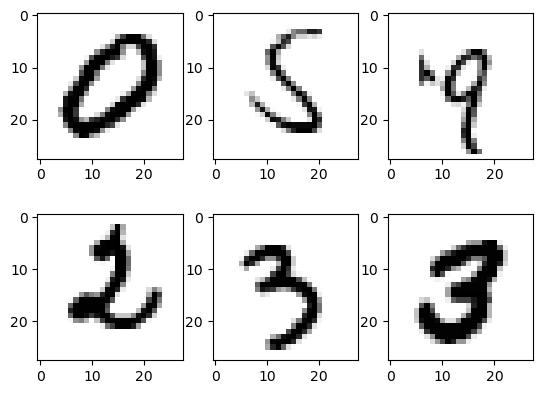

In [39]:
for i in range(0,6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray_r')

plt.show()

In [40]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out

In [41]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [42]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [43]:
n_total_steps = len(train_loader)

In [44]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape = [100, 1, 28, 28]
        # resized = [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass, loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if i % 100 == 0:
            print(f'Epoch {epoch}/{num_epochs}, Step {i}/{n_total_steps}, Loss {loss.item():.4f}')

Epoch 0/2, Step 0/600, Loss 2.3068
Epoch 0/2, Step 100/600, Loss 0.2874
Epoch 0/2, Step 200/600, Loss 0.1771
Epoch 0/2, Step 300/600, Loss 0.1106
Epoch 0/2, Step 400/600, Loss 0.1572
Epoch 0/2, Step 500/600, Loss 0.0952
Epoch 1/2, Step 0/600, Loss 0.2483
Epoch 1/2, Step 100/600, Loss 0.1133
Epoch 1/2, Step 200/600, Loss 0.0914
Epoch 1/2, Step 300/600, Loss 0.0789
Epoch 1/2, Step 400/600, Loss 0.0605
Epoch 1/2, Step 500/600, Loss 0.0662


In [45]:
# Don't need gradients for prediction
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # max returns max value, index
        _, predicted = torch.max(outputs,1)
        n_correct += (predicted==labels).sum().item()
    
    acc = n_correct/n_samples

print(f'Accuracy of trained model: {acc}')

Accuracy of trained model: 0.9695
